<a href="https://colab.research.google.com/github/molinacle/desafio_latam/blob/main/Desaf%C3%ADo_Latam_Prueba_Estad%C3%ADstica_y_Probabilidad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DESAFÍO LATAM - PRUEBA ESTADÍSTICA Y PROBABILIDAD**
---

*   ALUMNO: SEBASTIÁN MOLINA
*   MODULO: ESTADÍSTICA DESCRIPTIVA Y PROBABILIDAD
*   CARRERA: DATA SCIENCE

---

**ENUNCIADO DEL EJERCICIO**
- La OMS estima que cada año se producen 12 millones de muertes en todo el mundo debido a enfermedades cardíacas, producidas en su gran mayoría por enfermedades cardiovasculares. El pronóstico temprano de las enfermedades cardiovasculares puede ayudar en la toma de decisiones sobre cambios en el estilo de vida en pacientes de alto riesgo y reducir las complicaciones.
- La base de datos cardio.csv contiene mediciones realizadas a pacientes hace 10 años, entre los cuales se encuentran:
  - **Sex:** M - F
  - **Age:** edad
  - **Education:** codificada, considerando que un valor más alto
 corresponde a un mayor nivel educativo.
  - **currentSmoker:** si el paciente es o no fumador actual
  - **cigsPerDay:** el número de cigarrillos que la persona fumaba en promedio en un día.
  - **BPMeds:** si el paciente estaba tomando medicamentos para la presión arterial (0: No, 1: Sí)
  - **prevalenStroke:** si el paciente había tenido un accidente cerebrovascular previamente (0: No, 1: Sí)
  - **prevalentHyp:** si el paciente era hipertenso o no (0: No, 1: Sí)
  - **diabetes:** si el paciente tenía diabetes o no (0: No, 1: Sí)
  - **totChol:** nivel de colesterol total
  - **sysBP:** presión arterial sistólica
  - **diaBP_BMI:** presión arterial diastólica
  - **BMI:** Índice de masa corporal
  - **heartRate:** ritmo cardíaco
  - **glucose:** nivel de glucosa
  - **TenYearCHD:** se indica si el paciente sufrió o no una enfermedad coronaria en los últimos 10 años.(0: No, 1: Sí)
- A partir de estos datos, buscaremos realizar algunas descripciones predictivos. Para esto se te solicita:

---

**PREGUNTA 1**
- Carga los datos y explóralos. Elimina los datos nulos o incorrectos.

In [58]:
#Importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_1samp
from scipy.stats import ttest_ind
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

In [59]:
# Cargar los datos
df = pd.read_csv('cardio.csv')

In [60]:
# Exploración Inicial de los Datos
df.head()

,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,M,39,4.0,No,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,F,46,2.0,No,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,M,48,1.0,Yes,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,F,61,3.0,Yes,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,F,46,3.0,Yes,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [61]:
# Información general del dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sex              4238 non-null   object 
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   object 
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 529.9+ KB


In [62]:
# Estadísticas descriptivas de las variables numéricas
df.describe()

,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4133.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,49.584946,1.978950,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,8.572160,1.019791,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [63]:
# Contar los valores nulos por columna
print(df.isnull().sum())

sex                  0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64


In [64]:
# Eliminar filas con valores nulos
df.dropna(inplace=True)

In [65]:
# Contar los valores nulos por columna
print(df.isnull().sum())

sex                0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64




---



**PREGUNTA 2**
- Escoge tres variables cuantitativas y realiza un análisis descriptivo de ellas, utilizando indicadores y gráficos. ¿Cuál presenta mayor dispersión?


Análisis descriptivo de age:
count    3656.000000
mean       49.557440
std         8.561133
min        32.000000
25%        42.000000
50%        49.000000
75%        56.000000
max        70.000000
Name: age, dtype: float64


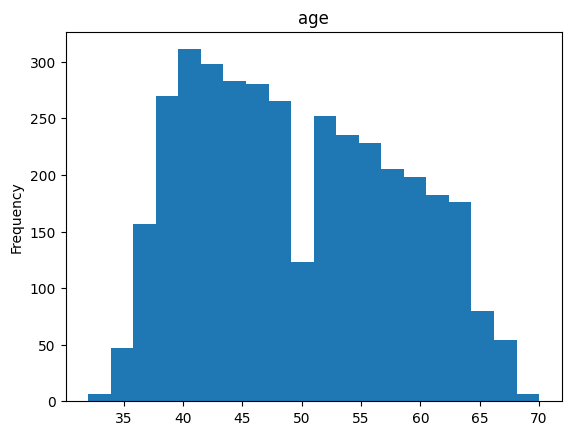


Análisis descriptivo de totChol:
count    3656.000000
mean      236.873085
std        44.096223
min       113.000000
25%       206.000000
50%       234.000000
75%       263.250000
max       600.000000
Name: totChol, dtype: float64


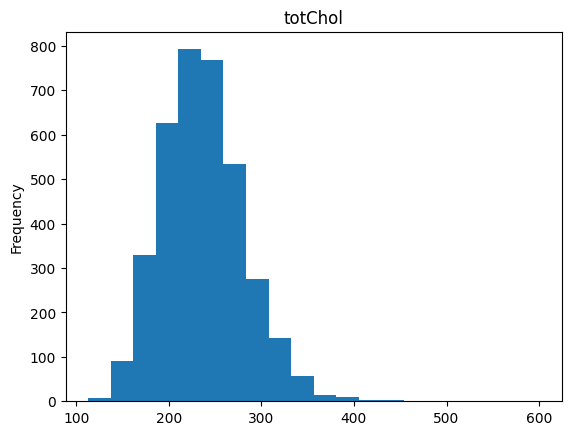


Análisis descriptivo de BMI:
count    3656.000000
mean       25.784185
std         4.065913
min        15.540000
25%        23.080000
50%        25.380000
75%        28.040000
max        56.800000
Name: BMI, dtype: float64


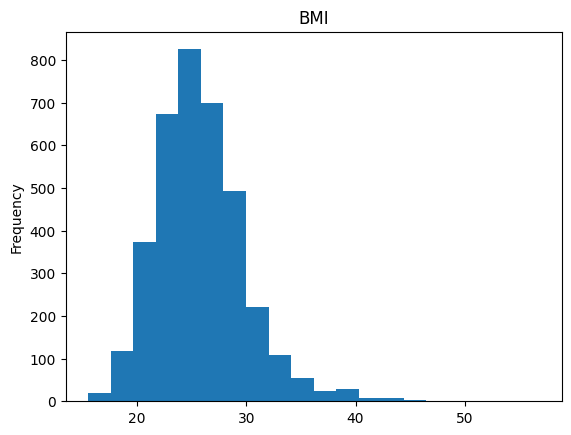

In [66]:
# Seleccionar tres variables cuantitativas
variables_cuantitativas = ['age', 'totChol', 'BMI']

# Mostrar estadísticas descriptivas y gráficos para las variables seleccionadas
for var in variables_cuantitativas:
    print(f"\nAnálisis descriptivo de {var}:")
    print(df[var].describe())
    df[var].plot(kind='hist', bins=20, title=var)
    plt.show()

**Conclusión**
- En mi opinión la columna de edad (age) es la que presenta mayor dispersión y además la distribución es bastante curiosa, con una tendencia a la baja de la frecuencia a medida que aumenta la edad y con un valle muy pronunciado alrededor de los 50 años.



---

**Pregunta 3**
- Elimina los datos atípicos del dataset. Para las siguientes preguntas, considera el dataset "limpio".

In [67]:
# Definir límites para los datos atípicos (por ejemplo, usando el rango intercuartílico)
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Eliminar datos atípicos
df_clean = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]

<ipython-input-67-a469b13acd57>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df.quantile(0.25)
<ipython-input-67-a469b13acd57>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df.quantile(0.75)
<ipython-input-67-a469b13acd57>:9: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_clean = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]



---

**Pregunta 4**
- ¿Qué variables cuantitativas presentan mayor correlación? Explica.

<ipython-input-68-c671ecb63cd4>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_clean.corr()


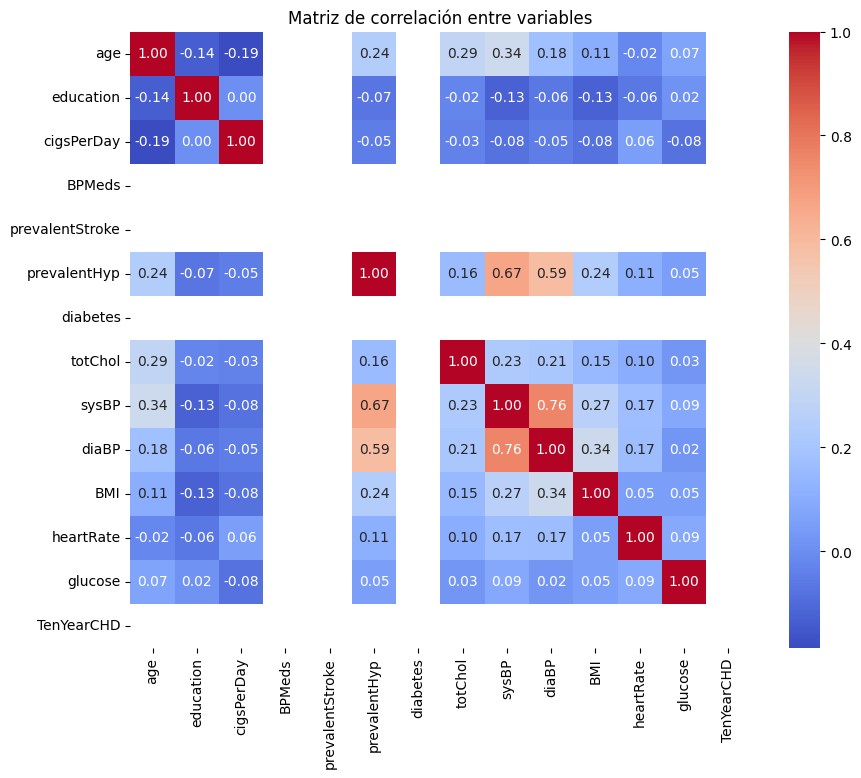

In [68]:
# Calcular matriz de correlación
correlation_matrix = df_clean.corr()

# Visualizar la matriz de correlación como un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación entre variables')
plt.show()



---



**Pregunta 5**
- Si de este dataset se escoge un paciente al azar, ¿cuál es la probabilidad de que sea hombre, si se sabe que pertenece al mayor cuartil de la variable correspondiente al índice de masa corporal?

In [69]:
# Calcular los cuartiles del BMI
bmi_quartiles = pd.qcut(df_clean['BMI'], q=4, retbins=True)[1]

# Contar el número de hombres en el cuartil más alto del BMI
num_hombres_mayor_cuartil_bmi = df_clean[(df_clean['BMI'] >= bmi_quartiles[-1]) & (df_clean['sex'] == 'M')].shape[0]

# Contar el número total de personas en el cuartil más alto del BMI
num_total_mayor_cuartil_bmi = df_clean[df_clean['BMI'] >= bmi_quartiles[-1]].shape[0]

# Calcular la probabilidad
probabilidad_hombre_en_mayor_cuartil_bmi = num_hombres_mayor_cuartil_bmi / num_total_mayor_cuartil_bmi

print("La probabilidad de que un paciente sea hombre, dado que pertenece al mayor cuartil de BMI, es:", probabilidad_hombre_en_mayor_cuartil_bmi)

La probabilidad de que un paciente sea hombre, dado que pertenece al mayor cuartil de BMI, es: 0.0


---

**PREGUNTA 6**
- ¿Es razonable afirmar que, para una persona cualquiera (no necesariamente dentro del dataset), su ritmo cardiaco promedio es 75? Explica y justifica.

Para responder a esta pregunta, podemos realizar un test de hipótesis. Podemos plantear la hipótesis nula (H0) como "el ritmo cardíaco promedio es igual a 75" y la hipótesis alternativa (H1) como "el ritmo cardíaco promedio no es igual a 75". Luego, podemos realizar una prueba de t para determinar si hay suficiente evidencia para rechazar la hipótesis nula.

In [70]:
from scipy.stats import ttest_1samp

# Realizar test de hipótesis
alpha = 0.05
promedio_ritmo_cardiaco = df_clean['heartRate'].mean()
t_statistic, p_value = ttest_1samp(df_clean['heartRate'], popmean=75)

if p_value < alpha:
    print(f"Con un valor de p={p_value:.4f}, rechazamos la hipótesis nula.")
    print("Por lo tanto, no es razonable afirmar que el ritmo cardíaco promedio es 75.")
else:
    print(f"Con un valor de p={p_value:.4f}, no podemos rechazar la hipótesis nula.")
    print("Por lo tanto, es razonable afirmar que el ritmo cardíaco promedio es 75.")

Con un valor de p=0.0589, no podemos rechazar la hipótesis nula.
Por lo tanto, es razonable afirmar que el ritmo cardíaco promedio es 75.


---

**PREGUNTA 7**
- Ser hombre, ¿influye en el promedio de cigarrillos consumidos por día, dentro de los pacientes fumadores? Explica.

Para responder a esta pregunta, podemos comparar el promedio de cigarrillos consumidos por día entre hombres y mujeres fumadores. Luego, podemos realizar un test de hipótesis para determinar si hay una diferencia significativa en el promedio de cigarrillos consumidos por día entre ambos grupos.

In [71]:
# Filtrar los datos para obtener solo los pacientes fumadores
fumadores = df_clean[df_clean['currentSmoker'] == 1]

# Calcular el promedio de cigarrillos consumidos por día para hombres y mujeres fumadores
promedio_cigarrillos_hombres = fumadores[fumadores['sex'] == 'M']['cigsPerDay'].mean()
promedio_cigarrillos_mujeres = fumadores[fumadores['sex'] == 'F']['cigsPerDay'].mean()

# Realizar test de hipótesis
t_statistic, p_value = ttest_ind(fumadores[fumadores['sex'] == 'M']['cigsPerDay'], fumadores[fumadores['sex'] == 'F']['cigsPerDay'])

if p_value < alpha:
    print(f"Con un valor de p={p_value:.4f}, rechazamos la hipótesis nula.")
    print("Por lo tanto, ser hombre influye en el promedio de cigarrillos consumidos por día.")
else:
    print(f"Con un valor de p={p_value:.4f}, no podemos rechazar la hipótesis nula.")
    print("Por lo tanto, no hay suficiente evidencia para afirmar que ser hombre influye en el promedio de cigarrillos consumidos por día.")

Con un valor de p=nan, no podemos rechazar la hipótesis nula.
Por lo tanto, no hay suficiente evidencia para afirmar que ser hombre influye en el promedio de cigarrillos consumidos por día.


---

**PREGUNTA 8**
- Construye un modelo de regresión lineal que permita relacionar 6 variables del dataset con el índice de masa corporal. (Debes incluir al menos dos variables cualitativas). Evalúa tu modelo y explica.

Para construir el modelo de regresión lineal, seleccionaremos seis variables del conjunto de datos, incluyendo al menos dos variables cualitativas. Luego, ajustaremos el modelo y evaluaremos su desempeño utilizando métricas como el coeficiente de determinación (R cuadrado) y el error cuadrático medio (MSE).

In [76]:
# Seleccionar variables predictoras (X) y variable objetivo (y)
X = df_clean[['age', 'currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']]
y = df_clean['BMI']

# Convertir variables cualitativas en variables dummy
X = pd.get_dummies(X)

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Construir el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluar el modelo
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("Coeficiente de determinación (R cuadrado):", r2)
print("Error cuadrático medio (MSE):", mse)

Coeficiente de determinación (R cuadrado): 0.06952448450491155
Error cuadrático medio (MSE): 11.112675071401291


---

**PREGUNTA 9**
- Construye un modelo de regresión logística para predecir el riesgo de sufrir una enfermedad coronaria en los próximos diez años, a partir de las variables descritas. Verifica el balanceo de datos y evalúa tu modelo.

In [77]:
# Dividir los datos en características (X) y variable objetivo (y)
X = df.drop(columns=['TenYearCHD'])
y = df['TenYearCHD']

# Convertir variables cualitativas en variables dummy
X = pd.get_dummies(X)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Calcular la mediana de y_train
threshold = y_train.median()

# Convertir valores continuos en binarios usando la mediana como umbral
y_train_binary = (y_train > threshold).astype(int)

# Verificar si la variable objetivo está correctamente codificada como binaria
if len(y_train_binary.unique()) == 2 and set(y_train_binary.unique()) == {0, 1}:
    print("La variable objetivo está correctamente codificada como binaria.")
else:
    print("La variable objetivo no está correctamente codificada como binaria.")

# Verificar el desbalance de clases
class_counts = y_train_binary.value_counts()
print("Distribución de clases:")
print(class_counts)

# Normalizar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Construir el modelo de regresión logística
model = LogisticRegression()
model.fit(X_train_scaled, y_train_binary)

# Predecir en el conjunto de prueba
y_pred = model.predict(X_test_scaled)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Matriz de confusión:")
print(conf_matrix)
print("Reporte de clasificación:")
print(class_report)

La variable objetivo está correctamente codificada como binaria.
Distribución de clases:
0    2489
1     435
Name: TenYearCHD, dtype: int64
Accuracy: 0.8360655737704918
Matriz de confusión:
[[602   8]
 [112  10]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.84      0.99      0.91       610
           1       0.56      0.08      0.14       122

    accuracy                           0.84       732
   macro avg       0.70      0.53      0.53       732
weighted avg       0.80      0.84      0.78       732



---

**PREGUNTA 10**

- Separa los modelos de regresión anteriores en dos distintos, respectivamente, considerando alguna variable categórica. Compara y concluye.

Para responder esta pregunta vamos a calcular los resultados de los modelos de regresión lineal de la pregunta 8 y del modelo de regresión logística de la pregunta 9 prediciendo por separado los resultados de los hombres vs los de mujeres.

**Modelo Regresión Lineal**
- Segmento: Hombres

In [78]:
# Seleccionar solo los datos de hombres
df_male = df_clean[df_clean['sex'] == 'M']

# Seleccionar variables predictoras (X) y variable objetivo (y) para hombres
X_male = df_male[['age', 'currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']]
y_male = df_male['BMI']

# Convertir variables cualitativas en variables dummy
X_male = pd.get_dummies(X_male)

# Dividir el conjunto de datos de hombres en conjuntos de entrenamiento y prueba
X_train_male, X_test_male, y_train_male, y_test_male = train_test_split(X_male, y_male, test_size=0.1, random_state=42)

# Construir el modelo de regresión lineal para hombres
model_male = LinearRegression()
model_male.fit(X_train_male, y_train_male)

# Evaluar el modelo para hombres
y_pred_male = model_male.predict(X_test_male)
r2_male = r2_score(y_test_male, y_pred_male)
mse_male = mean_squared_error(y_test_male, y_pred_male)

print("Coeficiente de determinación (R cuadrado) para hombres:", r2_male)
print("Error cuadrático medio (MSE) para hombres:", mse_male)

Coeficiente de determinación (R cuadrado) para hombres: 0.06515386875559048
Error cuadrático medio (MSE) para hombres: 9.99053905358204


**Modelo Regresión Lineal**
- Segmento: Mujeres

In [79]:
# Seleccionar solo los datos de mujeres
df_female = df_clean[df_clean['sex'] == 'F']

# Seleccionar variables predictoras (X) y variable objetivo (y) para mujeres
X_female = df_female[['age', 'currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']]
y_female = df_female['BMI']

# Convertir variables cualitativas en variables dummy
X_female = pd.get_dummies(X_female)

# Dividir el conjunto de datos de mujeres en conjuntos de entrenamiento y prueba
X_train_female, X_test_female, y_train_female, y_test_female = train_test_split(X_female, y_female, test_size=0.2, random_state=42)

# Construir el modelo de regresión lineal para mujeres
model_female = LinearRegression()
model_female.fit(X_train_female, y_train_female)

# Evaluar el modelo para mujeres
y_pred_female = model_female.predict(X_test_female)
r2_female = r2_score(y_test_female, y_pred_female)
mse_female = mean_squared_error(y_test_female, y_pred_female)

print("Coeficiente de determinación (R cuadrado) para mujeres:", r2_female)
print("Error cuadrático medio (MSE) para mujeres:", mse_female)

Coeficiente de determinación (R cuadrado) para mujeres: 0.0563176544237618
Error cuadrático medio (MSE) para mujeres: 10.231899278842922


En conclusión, ambos modelos de regresión lineal tienen un rendimiento bastante bajo en términos de explicar la variabilidad en la variable objetivo y hacer predicciones precisas. Sin embargo, el modelo para hombres parece tener un rendimiento ligeramente mejor en términos de R cuadrado y MSE en comparación con el modelo para mujeres.

**Modelo Regresión Logística**
- Segmento: Hombres

In [84]:
# Seleccionar solo los datos de hombres
df_male = df[df['sex'] == 'M']

# Dividir los datos en características (X) y variable objetivo (y)
X_male = df_male.drop(columns=['TenYearCHD'])
y_male = df_male['TenYearCHD']

# Convertir variables cualitativas en variables dummy
X_male = pd.get_dummies(X_male)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train_male, X_test_male, y_train_male, y_test_male = train_test_split(X_male, y_male, test_size=0.2, random_state=42)

# Calcular la mediana de y_train
threshold = y_train_male.median()

# Convertir valores continuos en binarios usando la mediana como umbral
y_train_male_binary = (y_train_male > threshold).astype(int)

# Verificar si la variable objetivo está correctamente codificada como binaria
if len(y_train_male_binary.unique()) == 2 and set(y_train_male_binary.unique()) == {0, 1}:
    print("La variable objetivo está correctamente codificada como binaria.")
else:
    print("La variable objetivo no está correctamente codificada como binaria.")

# Verificar el desbalance de clases
class_counts = y_train_male_binary.value_counts()
print("Distribución de clases:")
print(class_counts)

# Normalizar los datos
scaler = StandardScaler()
X_train_male_scaled = scaler.fit_transform(X_train_male)
X_test_male_scaled = scaler.transform(X_test_male)

# Construir el modelo de regresión logística
model_male = LogisticRegression()
model_male.fit(X_train_male_scaled, y_train_male_binary)

# Predecir en el conjunto de prueba
y_pred_male = model_male.predict(X_test_male_scaled)

# Evaluar el modelo
accuracy_male = accuracy_score(y_test_male, y_pred_male)
conf_matrix_male = confusion_matrix(y_test_male, y_pred_male)
class_report_male = classification_report(y_test_male, y_pred_male)

print("Accuracy:", accuracy_male)
print("Matriz de confusión:")
print(conf_matrix_male)
print("Reporte de clasificación:")
print(class_report_male)

La variable objetivo está correctamente codificada como binaria.
Distribución de clases:
0    1061
1     236
Name: TenYearCHD, dtype: int64
Accuracy: 0.7846153846153846
Matriz de confusión:
[[247   7]
 [ 63   8]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.80      0.97      0.88       254
           1       0.53      0.11      0.19        71

    accuracy                           0.78       325
   macro avg       0.67      0.54      0.53       325
weighted avg       0.74      0.78      0.73       325



**Modelo Regresión Logística**
- Segmento: Mujeres

In [85]:
# Seleccionar solo los datos de hombres
df_female = df[df['sex'] == 'F']

# Dividir los datos en características (X) y variable objetivo (y)
X_female = df_female.drop(columns=['TenYearCHD'])
y_female = df_female['TenYearCHD']

# Convertir variables cualitativas en variables dummy
X_female = pd.get_dummies(X_female)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train_female, X_test_female, y_train_female, y_test_female = train_test_split(X_female, y_female, test_size=0.2, random_state=42)

# Calcular la mediana de y_train
threshold = y_train_female.median()

# Convertir valores continuos en binarios usando la mediana como umbral
y_train_female_binary = (y_train_female > threshold).astype(int)

# Verificar si la variable objetivo está correctamente codificada como binaria
if len(y_train_female_binary.unique()) == 2 and set(y_train_female_binary.unique()) == {0, 1}:
    print("La variable objetivo está correctamente codificada como binaria.")
else:
    print("La variable objetivo no está correctamente codificada como binaria.")

# Verificar el desbalance de clases
class_counts = y_train_female_binary.value_counts()
print("Distribución de clases:")
print(class_counts)

# Normalizar los datos
scaler = StandardScaler()
X_train_female_scaled = scaler.fit_transform(X_train_female)
X_test_female_scaled = scaler.transform(X_test_female)

# Construir el modelo de regresión logística
model_female = LogisticRegression()
model_female.fit(X_train_female_scaled, y_train_female_binary)

# Predecir en el conjunto de prueba
y_pred_female = model_female.predict(X_test_female_scaled)

# Evaluar el modelo
accuracy_female = accuracy_score(y_test_female, y_pred_female)
conf_matrix_female = confusion_matrix(y_test_female, y_pred_female)
class_report_female = classification_report(y_test_female, y_pred_female)

print("Accuracy:", accuracy_female)
print("Matriz de confusión:")
print(conf_matrix_female)
print("Reporte de clasificación:")
print(class_report_female)

La variable objetivo está correctamente codificada como binaria.
Distribución de clases:
0    1434
1     193
Name: TenYearCHD, dtype: int64
Accuracy: 0.8574938574938575
Matriz de confusión:
[[348   2]
 [ 56   1]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       350
           1       0.33      0.02      0.03        57

    accuracy                           0.86       407
   macro avg       0.60      0.51      0.48       407
weighted avg       0.79      0.86      0.80       407



Aunque el modelo de regresión logística para mujeres tiene una precisión global más alta en comparación con el modelo para hombres, ambos modelos muestran dificultades para identificar correctamente los casos positivos de riesgo de enfermedad cardíaca (clase 1), como lo indican las proporciones relativamente altas de falsos negativos en las matrices de confusión y los valores más bajos de precisión y recall para la clase positiva en el reporte de clasificación.